# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load Data

In [4]:
df = pd.read_csv("/content/Unemployment in India.csv")

# Data exploration

In [5]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
583,Maharashtra,31-01-2020,Monthly,6.67,16715470.0,37.32,Urban
754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,West Bengal,30-11-2019,Monthly,6.61,10768462.0,43.44,Urban
562,Madhya Pradesh,30-06-2019,Monthly,6.38,6509340.0,38.80,Urban
613,Odisha,30-04-2020,Monthly,20.50,1303244.0,25.53,Urban


In [10]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [9]:
df.duplicated().sum()

np.int64(27)

# Data processing

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [18]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [19]:
df.sample(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
573,Madhya Pradesh,2020-05-31,Monthly,40.49,3879934.0,35.49,Urban
716,Uttar Pradesh,2019-09-30,Monthly,13.58,13522970.0,40.07,Urban
719,Uttar Pradesh,2019-12-31,Monthly,12.37,13857200.0,40.21,Urban


# data analysis

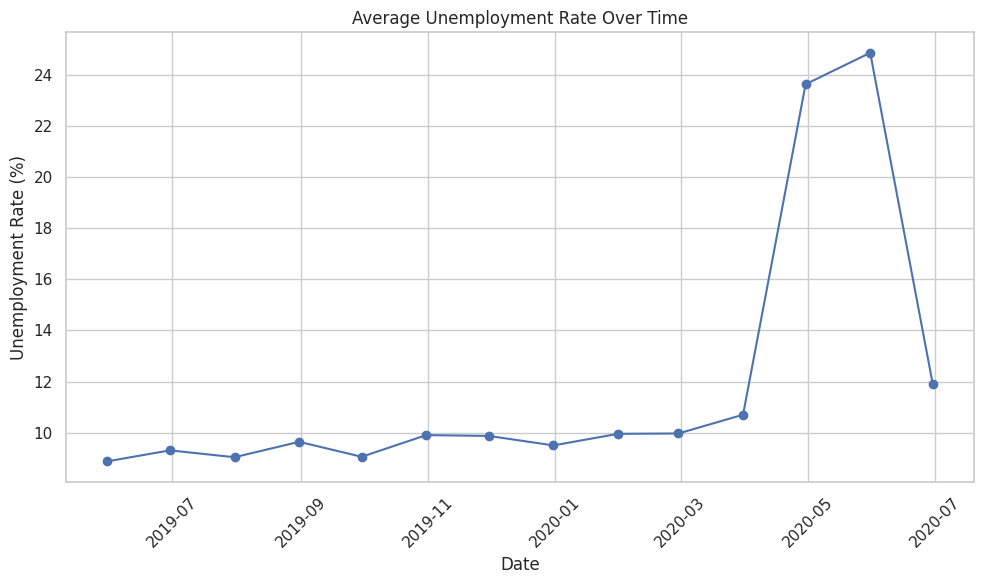

In [20]:
monthly_unemployment = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.plot(monthly_unemployment.index, monthly_unemployment.values, marker='o')
plt.title('Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


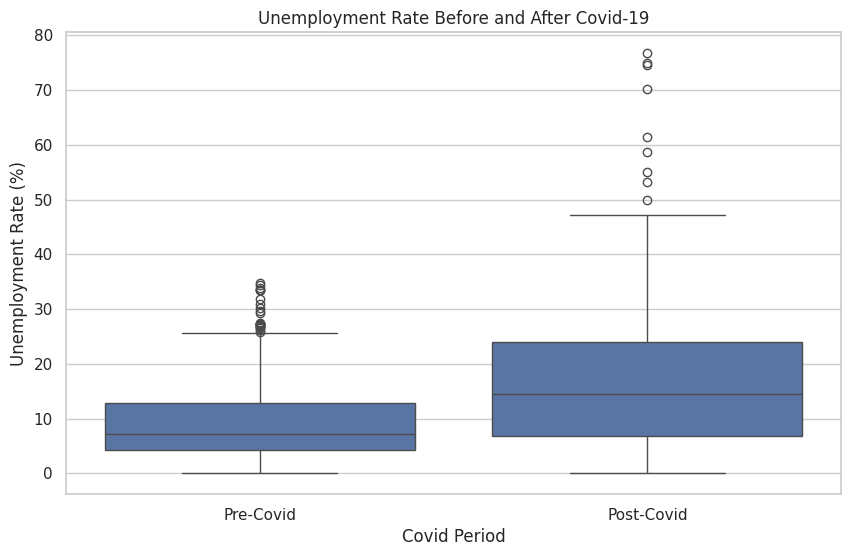

In [21]:
df['Covid Period'] = df['Date'].apply(lambda x: 'Pre-Covid' if x < pd.Timestamp('2020-03-01') else 'Post-Covid')

sns.boxplot(x='Covid Period', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Before and After Covid-19')
plt.ylabel('Unemployment Rate (%)')
plt.show()


<ipython-input-22-907a70686fb9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette='Reds_r')


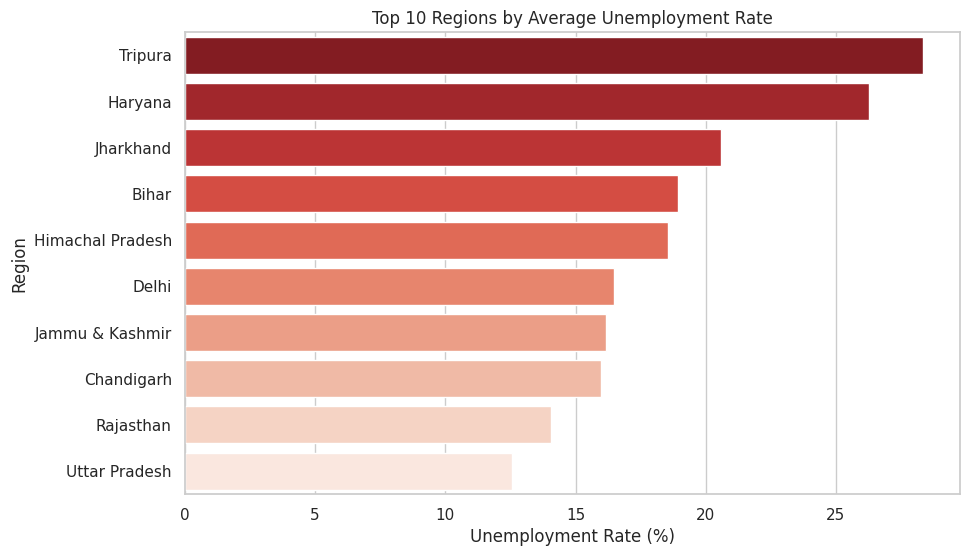

In [22]:
top_regions = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_regions.values, y=top_regions.index, palette='Reds_r')
plt.title('Top 10 Regions by Average Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()


<ipython-input-23-ad1a898c8cd7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=df, palette="pastel")


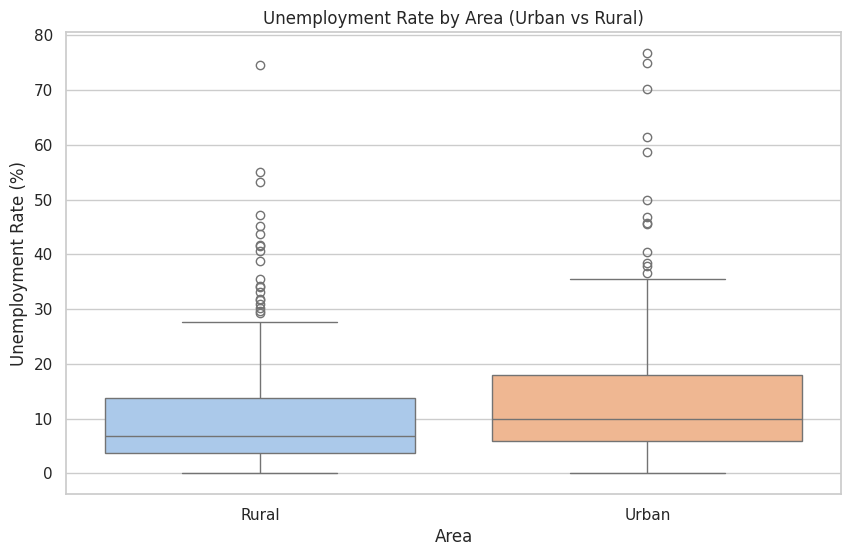

In [23]:
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=df, palette="pastel")
plt.title('Unemployment Rate by Area (Urban vs Rural)')
plt.ylabel('Unemployment Rate (%)')
plt.show()


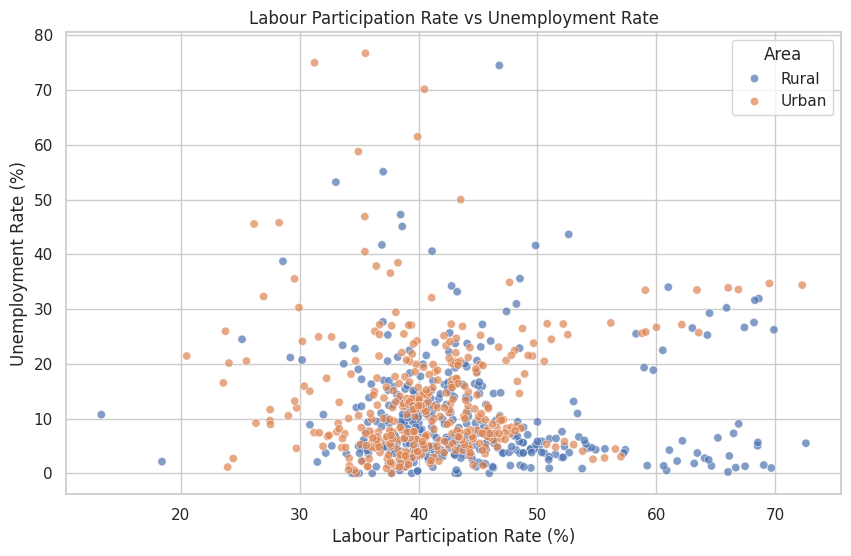

In [24]:
sns.scatterplot(
    x='Estimated Labour Participation Rate (%)',
    y='Estimated Unemployment Rate (%)',
    hue='Area',
    data=df,
    alpha=0.7
)
plt.title('Labour Participation Rate vs Unemployment Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()


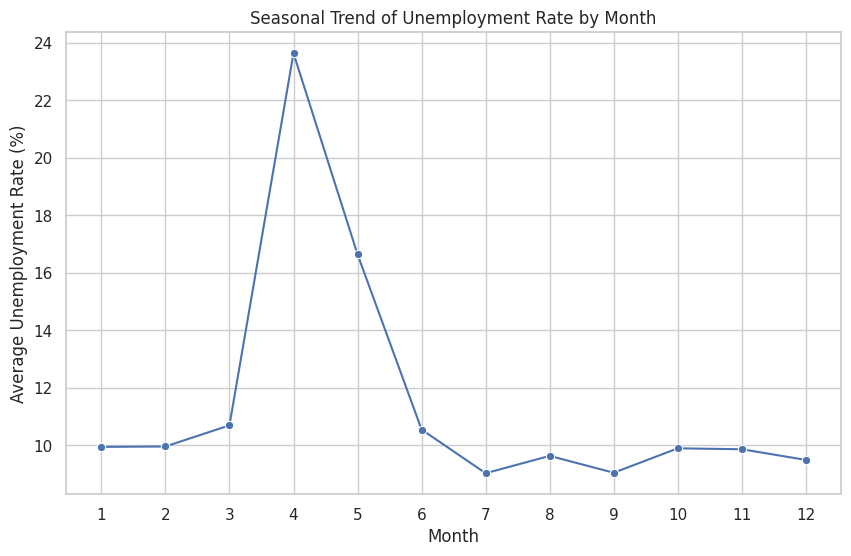

In [25]:
df = df.sort_values('Date')

df['Month'] = df['Date'].dt.month


monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Seasonal Trend of Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(range(1,13))
plt.show()


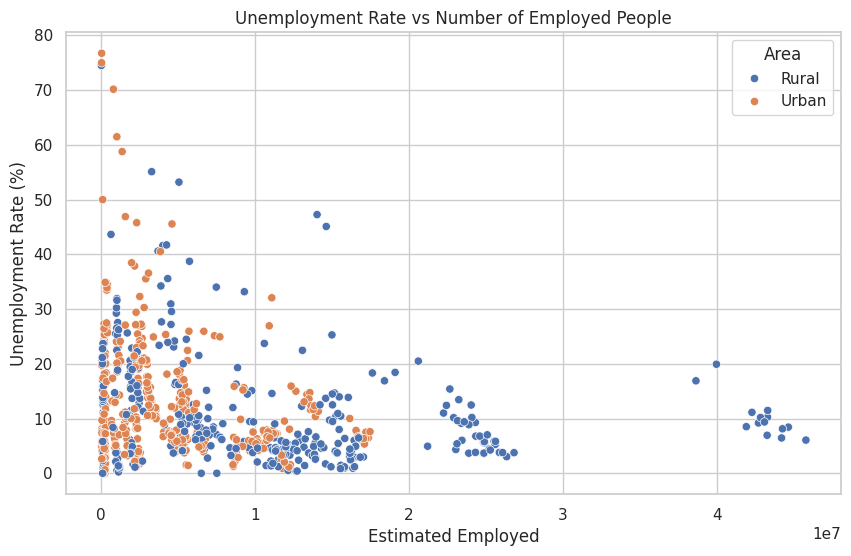

In [26]:
sns.scatterplot(
    x='Estimated Employed',
    y='Estimated Unemployment Rate (%)',
    data=df,
    hue='Area'
)
plt.title('Unemployment Rate vs Number of Employed People')
plt.xlabel('Estimated Employed')
plt.ylabel('Unemployment Rate (%)')
plt.show()


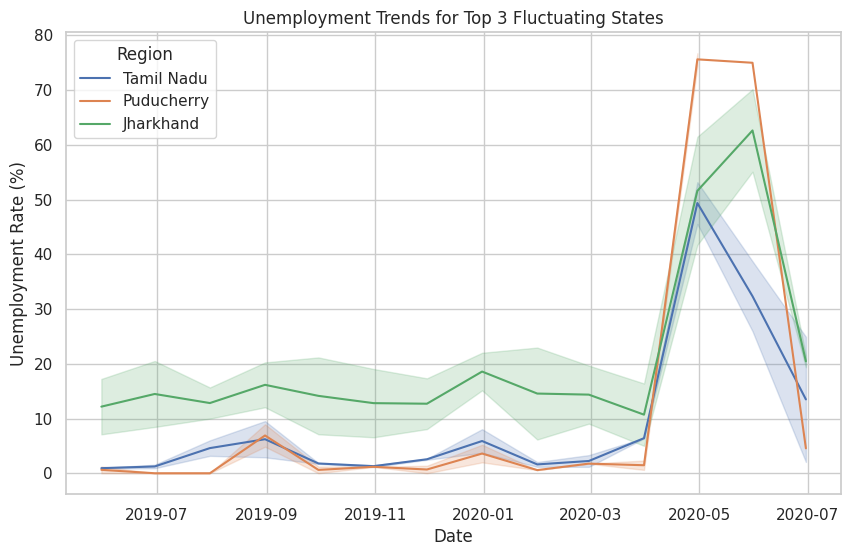

In [27]:
top_states = df.groupby('Region')['Estimated Unemployment Rate (%)'].std().sort_values(ascending=False).head(3).index
filtered = df[df['Region'].isin(top_states)]

sns.lineplot(data=filtered, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Trends for Top 3 Fluctuating States')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


## **Insights Summary**

1. **Unemployment Trends Over Time**
   The unemployment rate shows noticeable fluctuations over time, with a significant spike around the early months of 2020, corresponding to the beginning of the COVID-19 pandemic.

2. **Impact of COVID-19**
   A comparison between pre-COVID and post-COVID periods reveals a marked increase in unemployment rates, especially in urban areas. This indicates a substantial disruption in employment due to lockdowns and economic slowdowns.

3. **Top Regions with Highest Unemployment**
   Certain regions consistently exhibit higher average unemployment rates, suggesting structural or policy-driven economic challenges in those states.

4. **Urban vs Rural Disparity**
   Urban areas tend to have more volatile and higher unemployment rates compared to rural regions, possibly due to differences in industry dependency and migration patterns.

5. **Labour Participation Correlation**
   An inverse relationship appears between labour force participation and unemployment, indicating that areas with higher participation tend to maintain lower unemployment rates.

6. **Seasonal Trends**
   Some seasonal variations are noticeable, with unemployment peaking during specific months, likely reflecting agricultural cycles or fiscal year transitions.


## **Policy Recommendations**

1. **Urban Employment Programs**
   Launch targeted employment initiatives in urban regions most affected post-COVID, particularly focusing on informal sectors and migrant workers.

2. **State-Specific Interventions**
   Design tailored policy responses for high-unemployment regions based on local industry and workforce characteristics.

3. **Promote Labour Participation**
   Encourage higher labour force participation—especially among women and youth—through incentives, training programs, and access to flexible jobs.

4. **Support for Seasonal Workers**
   Introduce social protection and temporary employment schemes for workers affected by seasonal unemployment patterns.

5. **Crisis-Responsive Policies**
   Develop a rapid-response unemployment monitoring system to prepare for future economic disruptions like pandemics or natural disasters.
